# Projeto 1 

**Aluno**: Vinícius Bonetti Franceschi

**Disciplina**: Aprendizado de Máquina para a Área Biomédica - 2019

**Professora**: Ana Winck

--------------------------------------------------------------------------------

**Objetivo**: O objetivo deste projeto é avaliar o melhor algoritmo de agrupamento de dados,
dentre um conjunto de algoritmos selecionados, para um dataset de sua escolha.


## Dataset: Mall customer segmentation data

Dataset criado para aprendizado dos conceitos de segmentação de clientes.

**Disponível em**: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


## Importação e tratamento dos dados

In [6]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from sklearn.preprocessing import normalize, StandardScaler
%matplotlib inline

In [0]:
X = pd.read_csv('Mall_Customers.csv') 

In [0]:
drop_features = ['CustomerID', 'Gender'] 
X = X.drop(drop_features, axis = 1)
X.fillna(method ='ffill', inplace = True) 

In [10]:
X.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [0]:
# Pré processamento

# Escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Normalização
X_normalized = normalize(X_scaled)

In [12]:
# Carregando no pandas

X_normalized = pd.DataFrame(X_normalized) 
X_normalized.columns = X.columns 
X_normalized.head() 

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


## Algoritmos de agrupamento de dados

Foram escolhidos os algoritmos:

1.   **Kmeans**
2.   **Spectral Clustering**



## K means

O agrupamento K-means é um dos algoritmos de aprendizado de máquina não supervisionados mais simples e populares. O objetivo do K-means é simples: agrupar os pontos de dados semelhantes e descobrir padrões existentes. Para isso, o K-means procura um número fixo (k) de clusters em um conjunto de dados.

o algoritmo K-means identifica o número k de centróides e, em seguida, aloca todos os pontos de dados para o cluster mais próximo, mantendo os centróides (local imaginário ou real que representa o centro do cluster) menores possíveis.
Em outras palavras, cada ponto de dados é alocado para cada um dos clusters, reduzindo a soma dos quadrados no cluster. O "means" do nome se refere à média dos dados, isto é, encontrar o centróide.

Para processar os dados de aprendizado, o algoritmo começa com um primeiro grupo de centróides selecionados aleatoriamente, que são usados como pontos de partida para cada cluster e, em seguida, executa cálculos iterativos (repetitivos) para otimizar as posições dos centróides. Ele interrompe a criação e otimização de clusters quando:  com base nas features fornecidas.

* Os centróides se estabilizaram - não há alteração em seus valores porque o cluster foi bem-sucedido.
* O número definido de iterações foi alcançado.


### Plano de execução:

Variar os parâmetros, observando a melhor confuguração de parâmetros para este dataset:


*  n_clusters
*  algorithm
*  n_init
*  max_iter



## Agglomerative Clustering

O Agglomerative Clustering é o tipo mais comum de agrupamento hierárquico usado para agrupar objetos em clusters com base em sua similaridade. O agrupamento hierárquico baseia-se na ideia central de que os objetos estão mais relacionados a objetos próximos do que a objetos mais distantes. O algoritmo utiliza uma abordagem "bottom-up". Ou seja, cada objeto é inicialmente considerado como um cluster de elemento único (folha). Em cada etapa do algoritmo, os dois clusters mais semelhantes são combinados em um novo cluster maior. Este procedimento é refeito até que todos os pontos sejam membros de apenas um único grande cluster (raiz).

![alt text](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/images/hierarchical-clustering-agnes-diana.png))

O resultado é uma representação baseada em árvore dos objetos, chamada dendrograma.

![alt text](https://support.minitab.com/en-us/minitab/19/media/generated-content/images/cluster_obs_dendrogram_with_final_partition_glove_testers.png)

Um parâmetro exclusivo deste tipo de algoritmo é o linkage, que determina qual distância usar entre os conjuntos de observação. Em outras palavras, o algoritmo irá reunir os pares de cluster que minimizam esse critério. Algumas possibilidades deste parâmetro são:

*   Ward: minimiza a variação dos clusters que estão sendo mesclados;
*   Average: usa a média das distâncias de cada observação dos dois conjuntos;
*   Complete ou maximum linkage: usa as distâncias máximas entre todas as observações dos dois conjuntos;
*   Single: usa o mínimo das distâncias entre todas as observações dos dois conjuntos.

### Plano de execução:

Variar os parâmetros, observando a melhor confuguração de parâmetros para este dataset:


* n_clusters
* linkage
* affinity



## Medidas de avaliação de agrupamento de dados

Foram escolhidos as medidas:

1.   **Silhueta**
2.   **Calinski Harabasz score**

## Silhueta (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

Essa métrica avalia a qualidade das soluções com base na proximidade entre os objetos de determinado grupo e na distância desses objetos ao grupo mais próximo. O silhouette_score é calculado  usando a distância média intra-grupos (a) e a distância média do grupo mais próximo (b) para cada amostra. O silhouette_score para uma amostra é (b - a) / max (a, b). Portanto, esta métrica, por ser calculada para cada objeto, permite identificar se o objeto está alocado ao grupo mais adequado.

Valores positivos de silhueta indicam que o objeto está bem localizado em seu grupo, enquanto valores negativos indicam que o objeto está mais próximo de outro(s) grupo(s). Portanto, conclui-se que o melhor valor de silhueta é 1 e o pior valor é -1. Valores próximos a 0 indicam grupos sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao grupo errado.

Foram utilizadas duas funções do pacote sklearn.metrics, denominadas **silhouette_score** (que retorna o coeficiente médio da silhueta em todas as amostras) e **silhouette_samples** (que retorna uma lista com os valores de silhueta para cada amostra).

## Calinski Harabasz score (https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

Essa métrica foi escolhida por eliminação, uma vez que a grande maioria das métricas exige um conhecimento a priori do grupo a que cada amostra pertence. 

Essa métrica também é conhecida como critério de razão de variância. A pontuação é definida como a razão entre a dispersão dentro do grupo e a dispersão entre diferentes grupos.

Recebe como parâmetros X (lista de pontos de dados de dimensão n_features) e labels (rótulos previstos para cada amostra), retornando o score de Calinski Harabasz.

As principais vantagens são:


*   A pontuação é maior quando os grupos são densos e bem separados, o que se refere a um conceito padrão de grupos (clusters).
*   A pontuação é rápida de calcular

A principal desvantagem é:


*   O score de Calinski-Harabasz é geralmente mais alto para clusters convexos do que outros conceitos de clusters, como clusters baseados em densidade como os obtidos através do DBSCAN.





## K-Means

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

### Configuração com parâmetros default

In [14]:
kmeans_model = KMeans().fit(X_normalized)
labels = kmeans_model.labels_
print(labels)
centers = kmeans_model.cluster_centers_
silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
calinski = calinski_harabasz_score(X_normalized, labels)
print("Silhueta = {}".format(silhouette))
print("Calinski Harabasz = {}".format(calinski))

[6 0 6 0 6 0 6 0 4 0 4 0 4 0 6 0 6 0 4 0 6 0 4 0 4 0 4 0 6 0 4 0 4 0 4 0 4
 0 6 0 4 0 4 0 4 0 4 6 6 6 4 0 0 2 4 4 4 2 5 4 2 5 2 2 2 5 4 2 5 6 2 4 2 2
 2 5 2 4 5 4 2 0 2 4 5 2 2 5 0 2 2 5 2 7 5 5 2 5 2 5 5 2 2 5 2 5 2 2 2 2 2
 5 1 5 5 5 2 2 2 2 5 1 3 3 1 3 7 3 7 3 7 3 1 3 1 3 7 3 1 3 7 3 1 3 1 3 7 3
 1 3 7 3 7 3 7 3 1 3 1 3 7 3 1 3 7 3 7 3 1 3 7 3 1 3 7 3 7 3 7 3 1 3 7 3 7
 3 7 3 7 3 1 3 1 3 7 3 7 3 1 3]
Silhueta = 0.5012292219544692
Calinski Harabasz = 231.40708912592


### Para n_clusters variável

Verifica-se que o melhor valor para **n_clusters = 6**

n_clusters = 2, silhouette score = 0.3970829332731213, calinski score = 137.27973560720616
n_clusters = 3, silhouette score = 0.42642708587300826, calinski score = 135.12839022122316
n_clusters = 4, silhouette score = 0.4975810518351669, calinski score = 187.91752926730703
n_clusters = 5, silhouette score = 0.5040459505396213, calinski score = 200.5177417600994
n_clusters = 6, silhouette score = 0.5233211900388421, calinski score = 229.1653572525898
n_clusters = 7, silhouette score = 0.504078876316252, calinski score = 225.8013601277531
n_clusters = 8, silhouette score = 0.5024763794819485, calinski score = 229.04191986436084
n_clusters = 9, silhouette score = 0.5088277524107903, calinski score = 229.86613608478405
n_clusters = 10, silhouette score = 0.4677302529863552, calinski score = 224.5569087023689


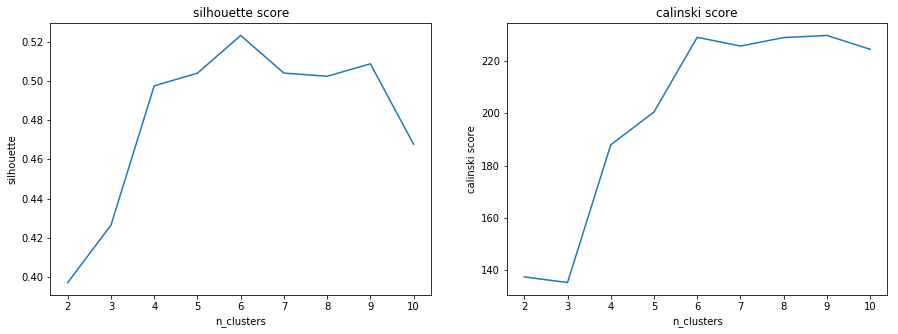

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

range_n_clusters = list(range(2,11))

silhouette_list = []
calinski_list = []
for n_clusters in range_n_clusters:
  kmeans_model = KMeans(n_clusters=n_clusters).fit(X_normalized)
  labels = kmeans_model.labels_
  centers = kmeans_model.cluster_centers_
  silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
  silhouette_list.append(silhouette)
  calinski = calinski_harabasz_score(X_normalized, labels)
  calinski_list.append(calinski)
  print("n_clusters = {}, silhouette score = {}, calinski score = {}".format(n_clusters, silhouette, calinski))

plt.show()

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(range_n_clusters, silhouette_list)
ax1.set_title("silhouette score")
ax1.set_xlabel("n_clusters")
ax1.set_ylabel("silhouette")

ax2.plot(range_n_clusters, calinski_list)
ax2.set_title("calinski score")
ax2.set_xlabel("n_clusters")
ax2.set_ylabel("calinski score")

plt.show()

### Variando n_clusters e algorithm

algorithm : “auto”, “full” or “elkan”, default=”auto” <br>
K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.

Verifica-se que o resultado mais confiável é n_clusters=6, que não apresenta mudança de resultados conforme muda o algorithm para o mesmo valor de n_clusters. Valores maiores como n_clusters={8, 9, 10} apresentam maiores resultados isolados, não vinculados ao mesmo algoritmo usado. Portanto, para n_clusters=6, a variação do algoritmo não afeta a qualidade do agrupamento de dados.

In [0]:
range_n_clusters = list(range(2,11))
algorithm_types = ['auto', 'full', 'elkan']

for n_clusters in range_n_clusters:
  for algorithm in algorithm_types:
    kmeans_model = KMeans(n_clusters=n_clusters, algorithm=algorithm).fit(X_normalized)
    labels = kmeans_model.labels_
    centers = kmeans_model.cluster_centers_
    silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
    calinski = calinski_harabasz_score(X_normalized, labels)
    print("n_clusters = {}, algorithm = {}, silhouette score = {}, calinski score = {}".format(n_clusters, algorithm, silhouette, calinski))

n_clusters = 2, algirithm = auto, silhouette score = 0.3970829332731213, calinski score = 137.27973560720616
n_clusters = 2, algirithm = full, silhouette score = 0.3970829332731213, calinski score = 137.27973560720616
n_clusters = 2, algirithm = elkan, silhouette score = 0.3970829332731213, calinski score = 137.27973560720616
n_clusters = 3, algirithm = auto, silhouette score = 0.4268579060775028, calinski score = 135.18088112308757
n_clusters = 3, algirithm = full, silhouette score = 0.4288310287146754, calinski score = 135.19489695097553
n_clusters = 3, algirithm = elkan, silhouette score = 0.42321367431722834, calinski score = 134.68977813313148
n_clusters = 4, algirithm = auto, silhouette score = 0.49759084723578584, calinski score = 187.94947121323574
n_clusters = 4, algirithm = full, silhouette score = 0.49759084723578584, calinski score = 187.94947121323574
n_clusters = 4, algirithm = elkan, silhouette score = 0.4979111767703462, calinski score = 187.8990299077968
n_clusters = 5

### Fixando n_clusters=6 e variando n_init de 2 a 50 (de 2 em 2)

n_init : int, default: 10 <br>
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

Verificamos que entre 8 e 10 (valor default) do parâmetro n_init, não há variação significativa em ambos os scores.

n_init = 2, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
n_init = 4, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
n_init = 6, silhouette score = 0.5233211900388421, calinski score = 229.1653572525898
n_init = 8, silhouette score = 0.5263208102361745, calinski score = 230.17498143949635
n_init = 10, silhouette score = 0.5263208102361745, calinski score = 230.17498143949626
n_init = 12, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
n_init = 14, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
n_init = 16, silhouette score = 0.5263208102361745, calinski score = 230.17498143949626
n_init = 18, silhouette score = 0.5263208102361745, calinski score = 230.17498143949626
n_init = 20, silhouette score = 0.5263208102361745, calinski score = 230.17498143949635
n_init = 22, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
n_init = 24, silhouette score = 0.526

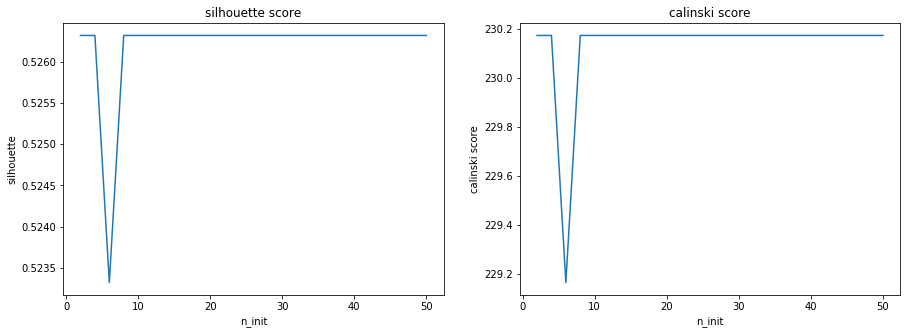

In [19]:
range_n_init = list(range(2, 51, 2))

silhouette_list = []
calinski_list = []
for n_init in range_n_init:
    kmeans_model = KMeans(n_clusters=6, n_init=n_init).fit(X_normalized)
    labels = kmeans_model.labels_
    centers = kmeans_model.cluster_centers_
    silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
    silhouette_list.append(silhouette)
    calinski = calinski_harabasz_score(X_normalized, labels)
    calinski_list.append(calinski)
    print("n_init = {}, silhouette score = {}, calinski score = {}".format(n_init, silhouette, calinski))

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(range_n_init, silhouette_list)
ax1.set_title("silhouette score")
ax1.set_xlabel("n_init")
ax1.set_ylabel("silhouette")

ax2.plot(range_n_init, calinski_list)
ax2.set_title("calinski score")
ax2.set_xlabel("n_init")
ax2.set_ylabel("calinski score")

plt.show()

### Fixando n_clusters=6 e variando max_iter de 50 a 500 (de 25 em 25)

max_iter: int, default: 300 <br>
Maximum number of iterations of the k-means algorithm for a single run

Verificamos que nenhum valor de max_iter alterou os scores, de modo que o valor default de 300 pode ser reduzido para 50, reduzindo o poder computacional necessário.

max_iter = 50, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 75, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 100, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 125, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 150, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 175, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 200, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 225, silhouette score = 0.5263208102361745, calinski score = 230.17498143949635
max_iter = 250, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
max_iter = 275, silhouette score = 0.5263208102361745, calinski score = 230.17498143949626
max_iter = 300, silhouette score = 0.5263208102361745, calinski score = 230.17498143949632
m

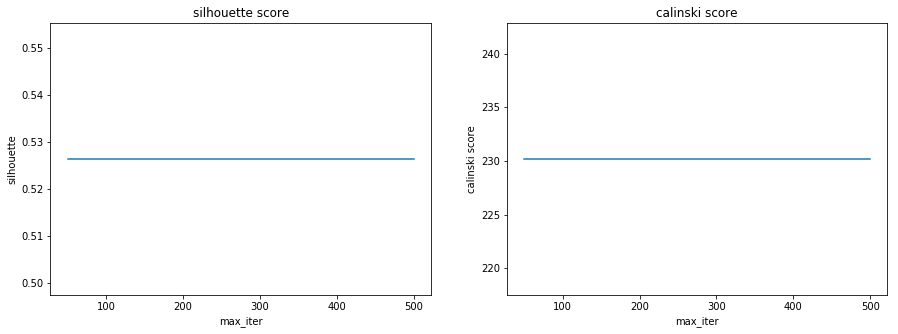

In [20]:
range_max_iter = list(range(50, 501, 25))

silhouette_list = []
calinski_list = []
for max_iter in range_max_iter:
    kmeans_model = KMeans(n_clusters=6, max_iter=max_iter).fit(X_normalized)
    labels = kmeans_model.labels_
    centers = kmeans_model.cluster_centers_
    silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
    silhouette_list.append(silhouette)
    calinski = calinski_harabasz_score(X_normalized, labels)
    calinski_list.append(calinski)
    print("max_iter = {}, silhouette score = {}, calinski score = {}".format(max_iter, silhouette, calinski))

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(range_max_iter, silhouette_list)
ax1.set_title("silhouette score")
ax1.set_xlabel("max_iter")
ax1.set_ylabel("silhouette")

ax2.plot(range_max_iter, calinski_list)
ax2.set_title("calinski score")
ax2.set_xlabel("max_iter")
ax2.set_ylabel("calinski score")

plt.show()

### Utilizando a melhor configuração encontrada

KMeans(n_clusters=6, n_init=8, max_iter=50)

In [26]:
kmeans_model = KMeans(n_clusters=6, n_init=8, max_iter=50).fit(X_normalized)
labels = kmeans_model.labels_
centers = kmeans_model.cluster_centers_
silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
calinski = calinski_harabasz_score(X_normalized, labels)
print("Silhueta = {}".format(silhouette))
print("Calinski Harabasz = {}".format(calinski))

Silhueta = 0.5263208102361745
Calinski Harabasz = 230.17498143949632


Text(0, 0.5, 'Feature space for the 2nd feature')

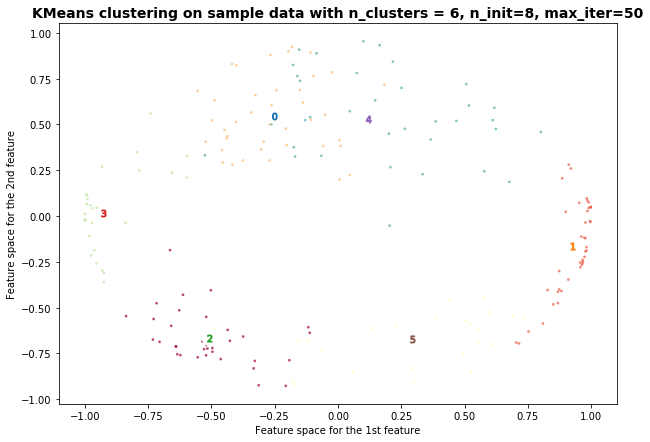

In [0]:
f = plt.figure(figsize=(10,7))

colors = plt.cm.Spectral(preds.astype(float) / 6)
plt.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
             c=colors)

plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=1, s=200)

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

plt.title(("KMeans clustering on sample data "
             "with n_clusters = 6, n_init=8, max_iter=50"),
             fontsize=14, fontweight='bold')

plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")


In [27]:
labels

array([4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 5, 4,
       5, 4, 1, 4, 4, 4, 1, 4, 4, 1, 1, 5, 1, 1, 4, 1, 1, 0, 1, 1, 1, 0,
       5, 1, 0, 4, 1, 5, 1, 1, 1, 0, 1, 5, 0, 1, 1, 4, 1, 1, 0, 1, 1, 0,
       4, 1, 1, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [30]:
X[:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


## Agglomerative clustering (Agrupamento hierárquico) 

In [0]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

### Configuração com parâmetros default

In [32]:
agglo_model = AgglomerativeClustering().fit(X_normalized)
labels = agglo_model.labels_
print(labels)
silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
calinski = calinski_harabasz_score(X_normalized, labels)
print("Silhueta = {}".format(silhouette))
print("Calinski Harabasz = {}".format(calinski))

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Silhueta = 0.37625974968686776
Calinski Harabasz = 123.5079642478839


### Para n_clusters variável

n_clusters : int or None, optional (default=2)
The number of clusters to find.

Verifica-se não há concordância entre os scores com relação ao n_clusters, de modo que é importante testar novos parâmetros juntamente com este!

n_clusters = 2, silhouette score = 0.37625974968686776, calinski score = 123.5079642478839
n_clusters = 3, silhouette score = 0.39759995727734876, calinski score = 122.50445446254955
n_clusters = 4, silhouette score = 0.4547067117897284, calinski score = 147.05831152397798
n_clusters = 5, silhouette score = 0.4858411635837739, calinski score = 181.45593214779313
n_clusters = 6, silhouette score = 0.5082314409240013, calinski score = 198.1843975737184
n_clusters = 7, silhouette score = 0.48664375734144616, calinski score = 202.04451568912208
n_clusters = 8, silhouette score = 0.48606340472576975, calinski score = 215.15472420332802
n_clusters = 9, silhouette score = 0.49221113062780125, calinski score = 215.37328264377564
n_clusters = 10, silhouette score = 0.457184871466987, calinski score = 212.9047192292808


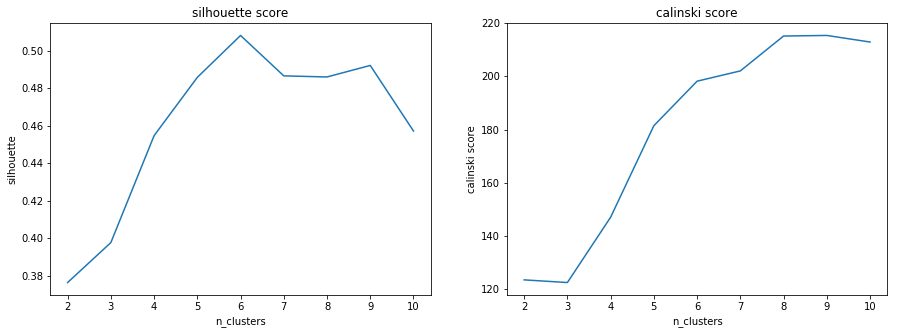

In [33]:
range_n_clusters = list(range(2,11))

silhouette_list = []
calinski_list = []
for n_clusters in range_n_clusters:
  agglo_model = AgglomerativeClustering(n_clusters=n_clusters).fit(X_normalized)
  labels = agglo_model.labels_
  silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
  silhouette_list.append(silhouette)
  calinski = calinski_harabasz_score(X_normalized, labels)
  calinski_list.append(calinski)
  print("n_clusters = {}, silhouette score = {}, calinski score = {}".format(n_clusters, silhouette, calinski))

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(range_n_clusters, silhouette_list)
ax1.set_title("silhouette score")
ax1.set_xlabel("n_clusters")
ax1.set_ylabel("silhouette")

ax2.plot(range_n_clusters, calinski_list)
ax2.set_title("calinski score")
ax2.set_xlabel("n_clusters")
ax2.set_ylabel("calinski score")

plt.show()

### Variando n_clusters e linkage

linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
The algorithm will merge the pairs of cluster that minimize this criterion.

A melhor configuração foi: <br>
n_clusters = 6, linkage = average, silhouette score = 0.5244504622329711, calinski score = 226.54196268187192

In [34]:
range_n_clusters = list(range(2,11))
linkage_types = ['ward', 'complete', 'average', 'single']

for n_clusters in range_n_clusters:
  for linkage in linkage_types:
    agglo_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit(X_normalized)
    labels = agglo_model.labels_
    silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
    calinski = calinski_harabasz_score(X_normalized, labels)
    print("n_clusters = {}, linkage = {}, silhouette score = {}, calinski score = {}".format(n_clusters, linkage, silhouette, calinski))

n_clusters = 2, linkage = ward, silhouette score = 0.37625974968686776, calinski score = 123.5079642478839
n_clusters = 2, linkage = complete, silhouette score = 0.39578108584651617, calinski score = 136.22385707739355
n_clusters = 2, linkage = average, silhouette score = 0.39498548546644174, calinski score = 136.41273317832253
n_clusters = 2, linkage = single, silhouette score = 0.27099334026312066, calinski score = 59.03561346036798
n_clusters = 3, linkage = ward, silhouette score = 0.39759995727734876, calinski score = 122.50445446254955
n_clusters = 3, linkage = complete, silhouette score = 0.36243512653318816, calinski score = 112.15555734647552
n_clusters = 3, linkage = average, silhouette score = 0.3959949935135856, calinski score = 121.8618916015189
n_clusters = 3, linkage = single, silhouette score = 0.07984578944700167, calinski score = 29.959072635128912
n_clusters = 4, linkage = ward, silhouette score = 0.4547067117897284, calinski score = 147.05831152397798
n_clusters = 4,

### Variando affinity, mantendo n_clusters=6 e linkage='average'

affinity : string or callable, default: “euclidean”
Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.

Verifica-se que os parâmetros de affinity={'euclidean', 'l2', 'cosine'}, obtiveram os mesmos resultados. Como 'euclidean' é o default, não há porque alterar esse parâmetro.

In [35]:
affinity_types = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

for affinity in affinity_types:
  agglo_model = AgglomerativeClustering(n_clusters=6, affinity=affinity, linkage='average').fit(X_normalized)
  labels = agglo_model.labels_
  silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
  calinski = calinski_harabasz_score(X_normalized, labels)
  print("affinity = {}, silhouette score = {}, calinski score = {}".format(affinity, silhouette, calinski))

affinity = euclidean, silhouette score = 0.5244504622329711, calinski score = 226.54196268187192
affinity = l1, silhouette score = 0.5150802513432088, calinski score = 206.92592564606477
affinity = l2, silhouette score = 0.5244504622329711, calinski score = 226.54196268187192
affinity = manhattan, silhouette score = 0.5150802513432088, calinski score = 206.92592564606477
affinity = cosine, silhouette score = 0.5244504622329711, calinski score = 226.54196268187192


### Utilizando a melhor configuração encontrada

AgglomerativeClustering(n_clusters=6, linkage='average')

In [37]:
agglo_model = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X_normalized)
labels = agglo_model.labels_
silhouette = silhouette_score(X_normalized, labels, metric='euclidean')
calinski = calinski_harabasz_score(X_normalized, labels)
print("Silhueta = {}".format(silhouette))
print("Calinski Harabasz = {}".format(calinski))

Silhueta = 0.5244504622329711
Calinski Harabasz = 226.54196268187192


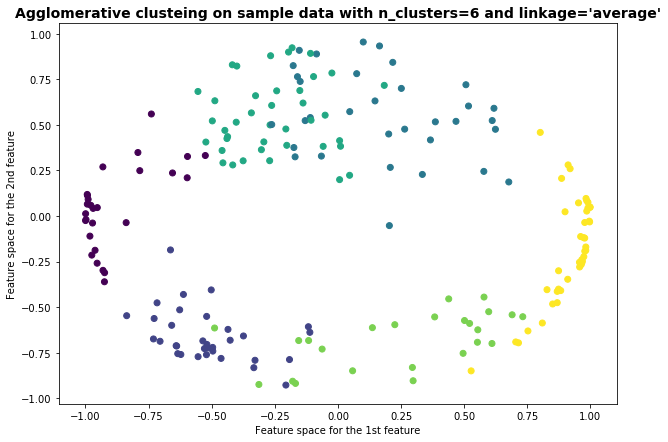

In [38]:
f = plt.figure(figsize=(10, 7))
plt.scatter(X_normalized.iloc[:,0], X_normalized.iloc[:,1], c=labels)
plt.title(("Agglomerative clusteing on sample data "
             "with n_clusters=6 and linkage='average'"),
             fontsize=14, fontweight='bold')

plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()

In [0]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    children = model.children_

    # Distances between each pair of children
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

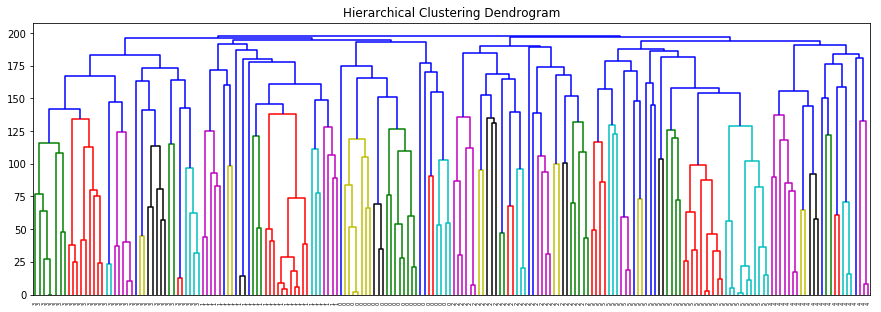

In [40]:
f = plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo_model, labels=agglo_model.labels_)
plt.show()

In [41]:
labels

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 5, 1, 4, 1,
       4, 1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 4, 5, 5, 1, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 1, 5, 4, 5, 5, 5, 0, 5, 4, 0, 5, 5, 1, 5, 5, 0, 5, 5, 0,
       1, 5, 5, 0, 5, 2, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 2, 0, 0, 0, 5, 5, 5, 5, 0, 2, 3, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 5, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [42]:
X[:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72
